In [10]:
from mlaut.analyze_results import AnalyseResults
from mlaut.data import Data
import pandas as pd
from mlaut.estimators.estimators import instantiate_default_estimators
from mlaut.analyze_results.scores import ScoreAccuracy

import matplotlib.pyplot as plt
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
import Orange

In [2]:
data = Data()
input_io = data.open_hdf5('data/delgado.h5', mode='r')
out_io = data.open_hdf5('data/delgado-classification-deep.h5', mode='r')
analyze = AnalyseResults(hdf5_output_io=out_io, 
                        hdf5_input_io=input_io, 
                        input_h5_original_datasets_group='openml/', 
                        output_h5_predictions_group='experiments/predictions/')


### All datasets

In [3]:
from mlaut.estimators.nn_estimators import Deep_NN_Classifier
hyperparameters = {'epochs': [50,100], 
                    'batch_size': [0, 50, 100]}
def keras_model1(num_classes, input_dim):
    model = OverwrittenSequentialClassifier()
    model.add(Dense(288, input_dim=input_dim, activation='relu'))
    model.add(Dense(144, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])

    return model

deep_nn_4_layer_thin_dropout = Deep_NN_Classifier(keras_model=keras_model1, 
                            properties={'name':'NN-4-layer_thin_dropout'})


def keras_model2(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_no_dropout = Deep_NN_Classifier(hyperparameters=hyperparameters,
                            keras_model=keras_model2,
                            properties={'name':'NN-4-layer_wide_no_dropout'})


def keras_model3(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_with_dropout = Deep_NN_Classifier(hyperparameters=hyperparameters,
                            keras_model=keras_model3,
                            properties={'name':'NN-4-layer_wide_with_dropout'})


def keras_model4(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(5000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(4500, activation='relu'))
    nn_deep_model.add(Dense(4000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(3500, activation='relu'))
    nn_deep_model.add(Dense(3000, activation='relu'))
    nn_deep_model.add(Dense(2500, activation='relu'))
    nn_deep_model.add(Dropout(0.5))


    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(500, activation='relu'))
    nn_deep_model.add(Dense(250, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_12_layer_wide_with_dropout = Deep_NN_Classifier(hyperparameters=hyperparameters,
                            keras_model=keras_model4,
                            properties={'name':'NN-12-layer_wide_with_dropout'})



def keras_model_1_lr01(num_classes, input_dim):
    model = OverwrittenSequentialClassifier()
    model.add(Dense(288, input_dim=input_dim, activation='relu'))
    model.add(Dense(144, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])

    return model

deep_nn_4_layer_thin_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_1_lr01, 
                            properties={'name':'NN-4-layer_thin_dropout_lr01'})

def keras_model_1_lr1(num_classes, input_dim):
    model = OverwrittenSequentialClassifier()
    model.add(Dense(288, input_dim=input_dim, activation='relu'))
    model.add(Dense(144, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])

    return model

deep_nn_4_layer_thin_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_1_lr1, 
                            properties={'name':'NN-4-layer_thin_dropout_lr1'})


def keras_model_2_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_no_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_2_lr01,
                            properties={'name':'NN-4-layer_wide_no_dropout_lr01'})


def keras_model_2_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_no_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_2_lr1,
                            properties={'name':'NN-4-layer_wide_no_dropout_lr1'})



def keras_model_3_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_with_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_3_lr01,
                            properties={'name':'NN-4-layer_wide_with_dropout_lr01'})


def keras_model_3_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_with_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_3_lr1,
                            properties={'name':'NN-4-layer_wide_with_dropout_lr1'})



def keras_model_4_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(5000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(4500, activation='relu'))
    nn_deep_model.add(Dense(4000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(3500, activation='relu'))
    nn_deep_model.add(Dense(3000, activation='relu'))
    nn_deep_model.add(Dense(2500, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    nn_deep_model.add(Dense(500, activation='relu'))
    nn_deep_model.add(Dense(250, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))
    
    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_12_layer_wide_with_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_4_lr01,
                            properties={'name':'NN-12-layer_wide_with_dropout_lr01'})

def keras_model_4_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(5000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(4500, activation='relu'))
    nn_deep_model.add(Dense(4000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(3500, activation='relu'))
    nn_deep_model.add(Dense(3000, activation='relu'))
    nn_deep_model.add(Dense(2500, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    nn_deep_model.add(Dense(500, activation='relu'))
    nn_deep_model.add(Dense(250, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))
    
    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_12_layer_wide_with_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_4_lr1,
                            properties={'name':'NN-12-layer_wide_with_dropout_lr1'})

def keras_model_5_lr0001(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(50, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_4_layer_droput_each_layer_lr0001 = Deep_NN_Classifier(keras_model=keras_model_5_lr0001,
                                        properties={'name':'NN-4-layer-droput-each-layer_lr0001'})

def keras_model_5_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(50, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_4_layer_droput_each_layer_lr01 = Deep_NN_Classifier(keras_model=keras_model_5_lr01,
                                        properties={'name':'NN-4-layer-droput-each-layer_lr01'})

def keras_model_5_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(50, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_4_layer_droput_each_layer_lr1 = Deep_NN_Classifier(keras_model=keras_model_5_lr01,
                                        properties={'name':'NN-4-layer-droput-each-layer_lr1'})

def keras_model_6_lr001(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dropout(0.7, input_shape=(input_dim,)))
    nn_deep_model.add(Dense(1024, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_2_layer_droput_input_layer_lr001 = Deep_NN_Classifier(keras_model=keras_model_6_lr001,
                                        properties={'name':'NN-2-layer-droput-input-layer_lr001'})

def keras_model_6_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dropout(0.7, input_shape=(input_dim,)))
    nn_deep_model.add(Dense(1024, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_2_layer_droput_input_layer_lr01 = Deep_NN_Classifier(keras_model=keras_model_6_lr01,
                                        properties={'name':'NN-2-layer-droput-input-layer_lr01'})

def keras_model_6_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dropout(0.7, input_shape=(input_dim,)))
    nn_deep_model.add(Dense(1024, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_2_layer_droput_input_layer_lr1 = Deep_NN_Classifier(keras_model=keras_model_6_lr1,
                                        properties={'name':'NN-2-layer-droput-input-layer_lr1'})

estimators = [deep_nn_4_layer_thin_dropout_lr01,
            deep_nn_4_layer_thin_dropout_lr1, 
            deep_nn_4_layer_wide_no_dropout_lr01,
            deep_nn_4_layer_wide_no_dropout_lr1,
            deep_nn_4_layer_wide_with_dropout_lr01,
            deep_nn_4_layer_wide_with_dropout_lr1,
            deep_nn_12_layer_wide_with_dropout_lr01,
            deep_nn_12_layer_wide_with_dropout_lr1,
            deep_nn_4_layer_droput_each_layer_lr0001,
            deep_nn_4_layer_droput_each_layer_lr01,
            deep_nn_4_layer_droput_each_layer_lr1,
            deep_nn_4_layer_thin_dropout,
            deep_nn_4_layer_wide_no_dropout, 
            deep_nn_4_layer_wide_with_dropout,
            deep_nn_12_layer_wide_with_dropout,            
              deep_nn_2_layer_droput_input_layer_lr001,
            deep_nn_2_layer_droput_input_layer_lr01,
            deep_nn_2_layer_droput_input_layer_lr1]

estim = instantiate_default_estimators(['Classification'])
# estimators = []
for e in estim:
    if e.properties['name'] is not 'NeuralNetworkDeepClassifier':
        estimators.append(e)

In [4]:
# estimators = instantiate_default_estimators(['Classification'])
score_accuracy = ScoreAccuracy()

# (errors_per_estimator, 
#  errors_per_dataset_per_estimator) = analyze.prediction_errors(metric=score_accuracy, estimators=estimators)
 
(errors_per_estimator, 
 errors_per_dataset_per_estimator, 
 errors_per_dataset_per_estimator_df) = analyze.prediction_errors(score_accuracy, estimators)

#### Simple average and standard error

In [5]:
avg_and_std_error = analyze.average_and_std_error(errors_per_estimator)
# avg_and_std_error.index.name='Estimator Name'
avg_and_std_error.round(3)

,avg_score,std_error
BaselineClassifier,0.419,0.019
NN-12-layer_wide_with_dropout_lr1,0.458,0.023
NN-4-layer_thin_dropout_lr1,0.462,0.023
NN-4-layer_wide_with_dropout_lr01,0.478,0.022
NN-12-layer_wide_with_dropout_lr01,0.479,0.022
NN-4-layer-droput-each-layer_lr01,0.482,0.022
NN-4-layer_wide_with_dropout_lr1,0.483,0.022
NN-4-layer-droput-each-layer_lr1,0.488,0.022
NN-4-layer_wide_no_dropout_lr1,0.490,0.022
NN-4-layer_wide_no_dropout_lr01,0.494,0.022


#### Average Rank

In [6]:
avg_rank = analyze.ranks(errors_per_estimator, ascending=False)
avg_rank.round(1)

,avg_rank
RandomForestClassifier,4.3
SVC,5.0
K_Neighbours,5.6
BaggingClassifier,5.8
GradientBoostingClassifier,7.6
PassiveAggressiveClassifier,8.5
NN-4-layer_wide_with_dropout,10.0
NN-4-layer_wide_no_dropout,10.5
BernoulliNaiveBayes,10.9
NN-4-layer-droput-each-layer_lr0001,11.2


In [7]:
ranks= avg_rank['avg_rank'].tolist()
names = avg_rank.index

In [8]:
ns = []
rs = []
first_nn_found = False

for r,n in zip(ranks,names):
    if n.startswith('NN') and first_nn_found == False:
        ns.append(n)
        rs.append(r)
        first_nn_found = True
    else:
        if not n.startswith('NN'):
            ns.append(n)
            rs.append(r)

In [11]:
cd = Orange.evaluation.compute_CD(rs,121)

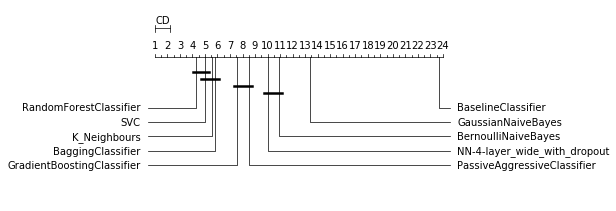

In [12]:
Orange.evaluation.graph_ranks(avranks=rs, names=ns, cd=cd)
plt.show()

#### Training time

In [ ]:
avg_training_time, training_time_per_dataset = analyze.average_training_time(estimators)


In [ ]:
avg_training_time

#### merge avg score, rank and training time

In [ ]:
avg_metrics = pd.DataFrame.merge(avg_rank,avg_and_std_error, left_index=True, right_index=True)
avg_metrics = pd.DataFrame.merge(avg_metrics, avg_training_time,left_index=True, right_index=True)
avg_metrics
#change names of estimators
as_list = avg_metrics.index.tolist()
idx = as_list.index('NN-12-layer_wide_with_dropout')
as_list[idx] = 'NN-12-layer_wide_with_dropout_lr001'

idx = as_list.index('NN-4-layer_wide_with_dropout')
as_list[idx] = 'NN-4-layer_wide_with_dropout_lr001'

idx = as_list.index('NN-4-layer_wide_no_dropout')
as_list[idx] = 'NN-4-layer_wide_no_dropout_lr001'


idx = as_list.index('NN-4-layer_thin_dropout')
as_list[idx] = 'NN-4-layer_thin_dropout_lr001'

avg_metrics.index = as_list

avg_metrics

#### Cohen's d

In [ ]:
cohens_d = analyze.cohens_d(errors_per_estimator)
cohens_d.round(2)

#### t-test

In [ ]:
t_test, t_test_df = analyze.t_test(errors_per_estimator)
t_test_df.round(3)

In [ ]:
t_test_df.iloc[:,0:8]

#### sign test

In [ ]:
sign_test, sign_test_df = analyze.sign_test(errors_per_estimator)
sign_test_df

#### t-test with Bonferroni correction

In [ ]:
t_test_bonferroni_df = analyze.t_test_with_bonferroni_correction(errors_per_estimator)
t_test_bonferroni_df

In [ ]:
for e in estim:
    print(e.properties['name'])

#### Wilcoxon test

In [ ]:
a, wilcoxon_df_multiindex = analyze.wilcoxon_test(errors_per_estimator)
wilcoxon_df_multiindex

#### Friedman test

In [ ]:
_, friedman_test_df = analyze.friedman_test(errors_per_estimator)
friedman_test_df

In [ ]:
nemeniy_test = analyze.nemenyi(errors_per_estimator)
nemeniy_test_df = pd.DataFrame(nemeniy_test)
nemeniy_test_df

### Per dataset

In [ ]:
errors_per_dataset_per_estimator_df

## Save tables to $\LaTeX$

In [ ]:
#t-test
with open('../mlaut-paper/mlaut/tables/t_test.tex', 'w') as tf:
    tf.write(t_test_df.to_latex())
    
t_test1 = t_test_df.iloc[:,0:8]
t_test2 = t_test_df.iloc[:,8:16]
t_test3 = t_test_df.iloc[:,16:24]
t_test4 = t_test_df.iloc[:,24:32]
t_test5 = t_test_df.iloc[:,32:40]
t_test6 = t_test_df.iloc[:,40:48]
t_test7 = t_test_df.iloc[:,48:54]

with open('../mlaut-paper/mlaut/tables/t_test1.tex', 'w') as tf:
    tf.write(t_test1.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test2.tex', 'w') as tf:
    tf.write(t_test2.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test3.tex', 'w') as tf:
    tf.write(t_test3.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test4.tex', 'w') as tf:
    tf.write(t_test4.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test5.tex', 'w') as tf:
    tf.write(t_test5.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test6.tex', 'w') as tf:
    tf.write(t_test6.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test7.tex', 'w') as tf:
    tf.write(t_test7.to_latex()) 

In [ ]:
#t-test with Bonferroni
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni.tex', 'w') as tf:
    tf.write(t_test_bonferroni_df.to_latex())
    
t_test_bonferroni1 = t_test_bonferroni_df.iloc[:,0:4]
t_test_bonferroni2 = t_test_bonferroni_df.iloc[:,4:8]
t_test_bonferroni3 = t_test_bonferroni_df.iloc[:,8:12]
t_test_bonferroni4 = t_test_bonferroni_df.iloc[:,12:16]
t_test_bonferroni5 = t_test_bonferroni_df.iloc[:,16:20]
t_test_bonferroni6 = t_test_bonferroni_df.iloc[:,20:24]
t_test_bonferroni7 = t_test_bonferroni_df.iloc[:,24:27]

with open('../mlaut-paper/mlaut/tables/t_test_bonferroni1.tex', 'w') as tf:
    tf.write(t_test_bonferroni1.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni2.tex', 'w') as tf:
    tf.write(t_test_bonferroni2.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni3.tex', 'w') as tf:
    tf.write(t_test_bonferroni3.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni4.tex', 'w') as tf:
    tf.write(t_test_bonferroni4.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni5.tex', 'w') as tf:
    tf.write(t_test_bonferroni5.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni6.tex', 'w') as tf:
    tf.write(t_test_bonferroni6.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni7.tex', 'w') as tf:
    tf.write(t_test_bonferroni7.to_latex())

In [ ]:
#sign test
with open('../mlaut-paper/mlaut/tables/sign_test.tex', 'w') as tf:
    tf.write(sign_test_df.to_latex())
sign_test1 = sign_test_df.iloc[:,0:8]
sign_test2 = sign_test_df.iloc[:,8:16]
sign_test3= sign_test_df.iloc[:,16:24]
sign_test4 = sign_test_df.iloc[:,24:32]
sign_test5 = sign_test_df.iloc[:,32:40]
sign_test6 = sign_test_df.iloc[:,40:48]
sign_test7 = sign_test_df.iloc[:,48:54]
with open('../mlaut-paper/mlaut/tables/sign_test1.tex', 'w') as tf:
    tf.write(sign_test1.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test2.tex', 'w') as tf:
    tf.write(sign_test2.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test3.tex', 'w') as tf:
    tf.write(sign_test3.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test4.tex', 'w') as tf:
    tf.write(sign_test4.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test5.tex', 'w') as tf:
    tf.write(sign_test5.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test6.tex', 'w') as tf:
    tf.write(sign_test6.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test7.tex', 'w') as tf:
    tf.write(sign_test7.to_latex())

In [ ]:
#Wilcoxon
with open('../mlaut-paper/mlaut/tables/wilxocon_test.tex', 'w') as tf:
    tf.write(wilcoxon_df_multiindex.to_latex())
    
wilcoxon1 = wilcoxon_df_multiindex.iloc[:,0:8]
wilcoxon2 = wilcoxon_df_multiindex.iloc[:,8:16]
wilcoxon3 = wilcoxon_df_multiindex.iloc[:,16:24]
wilcoxon4 = wilcoxon_df_multiindex.iloc[:,24:32]
wilcoxon5 = wilcoxon_df_multiindex.iloc[:,32:40]
wilcoxon6 = wilcoxon_df_multiindex.iloc[:,40:48]
wilcoxon7 = wilcoxon_df_multiindex.iloc[:,48:54]

with open('../mlaut-paper/mlaut/tables/wilcoxon_test1.tex', 'w') as tf:
    tf.write(wilcoxon1.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test2.tex', 'w') as tf:
    tf.write(wilcoxon2.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test3.tex', 'w') as tf:
    tf.write(wilcoxon3.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test4.tex', 'w') as tf:
    tf.write(wilcoxon4.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test5.tex', 'w') as tf:
    tf.write(wilcoxon5.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test6.tex', 'w') as tf:
    tf.write(wilcoxon6.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test7.tex', 'w') as tf:
    tf.write(wilcoxon7.to_latex())

In [ ]:
#Nemeniy test
with open('../mlaut-paper/mlaut/tables/nemeniy_test.tex', 'w') as tf:
    tf.write(nemeniy_test_df.to_latex())
    
nemeniy_test1 = nemeniy_test_df.iloc[:,0:4]
nemeniy_test2 = nemeniy_test_df.iloc[:,4:8]
nemeniy_test3 = nemeniy_test_df.iloc[:,8:12]
nemeniy_test4 = nemeniy_test_df.iloc[:,12:16]
nemeniy_test5 = nemeniy_test_df.iloc[:,16:20]
nemeniy_test6 = nemeniy_test_df.iloc[:,20:24]
nemeniy_test7 = nemeniy_test_df.iloc[:,24:27]

with open('../mlaut-paper/mlaut/tables/nemeniy_test1.tex', 'w') as tf:
    tf.write(nemeniy_test1.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test2.tex', 'w') as tf:
    tf.write(nemeniy_test2.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test3.tex', 'w') as tf:
    tf.write(nemeniy_test3.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test4.tex', 'w') as tf:
    tf.write(nemeniy_test4.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test5.tex', 'w') as tf:
    tf.write(nemeniy_test5.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test6.tex', 'w') as tf:
    tf.write(nemeniy_test6.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test7.tex', 'w') as tf:
    tf.write(nemeniy_test7.to_latex())

In [ ]:
#average and standard error
with open('../mlaut-paper/mlaut/tables/avg_and_st_error.tex', 'w') as tf:
    tf.write(avg_and_std_error.to_latex())
#average trining time
with open('../mlaut-paper/mlaut/tables/avg_training_time.tex', 'w') as tf:
    tf.write(avg_training_time.to_latex())
#average rank
with open('../mlaut-paper/mlaut/tables/avg_rank.tex', 'w') as tf:
    tf.write(avg_rank.to_latex())

#average metrics
with open('../mlaut-paper/mlaut/tables/avg_metrics.tex', 'w') as tf:
    tf.write(avg_metrics.to_latex())
#Cohen's D
with open('../mlaut-paper/mlaut/tables/cohens_d.tex', 'w') as tf:
    tf.write(cohens_d.to_latex())



#Errors per dataset per estimator
with open('../mlaut-paper/mlaut/tables/errors_per_dataset_per_estimator.tex', 'w') as tf:
    tf.write(errors_per_dataset_per_estimator_df.to_latex(longtable=True))
#              replace('\n', '\n\\caption{Errors per dataset and estimator}\\\\\n', 1))

In [ ]:
with open('../mlaut-paper/mlaut/tables/friedman_test.tex', 'w') as tf:
    tf.write(friedman_test_df.to_latex(index=False))